# Intro to Machine Learning: Linear Models 

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/nhartman94/PALMS2024/blob/solutions/ML-intro-SOLN.ipynb)

Nicole Hartman, PALMS2024

**Data detective:**  We're going to give you a "mystery dataset" and your challenge is to find the 
$\theta = [\theta_0,\theta_1,\theta_2,\theta_3]$ 
if we fit linear model to this dataset where the "basis" dimensions are a $3^{rd}$ degree polynomial.


In [1]:
import numpy as np
import pandas as pd # just for file loading
import matplotlib.pyplot as plt

## Step 0: Load in the data

In [2]:
'''
Soln: The code that generated the dataset
'''
n = 32
x = np.random.uniform(-3,3,n)

# Construct the "features" for the linear model,
# assumed to be a third order polynomial
x0 = np.ones_like(x)
x1 = x
x2 = x**2
x3 = x**3

X = np.column_stack([x0,x1,x2,x3])

eps = 0.2 * np.random.randn(n)

theta_true = np.array([-1,3,2,-1])

y = X @ theta_true + eps

# Save the dataframe
df = pd.DataFrame(np.column_stack([x,y]),columns=['x','y'])
df.to_hdf('data.h5',key='df')

In [3]:
# Load the data
df = pd.read_hdf('data.h5')

In [4]:
df

,x,y
0,1.002449,2.816525
1,-0.484741,-1.916341
2,-0.571503,-1.660512
3,1.571730,4.471099
4,2.352056,4.205029
5,-1.991044,9.059872
6,2.023070,4.983041
7,-0.297098,-1.911301
8,-0.023871,-1.160766
9,1.093149,3.521039


In [5]:
# Put this data in numpy arrays
x = df['x'].values
y = df['y'].values

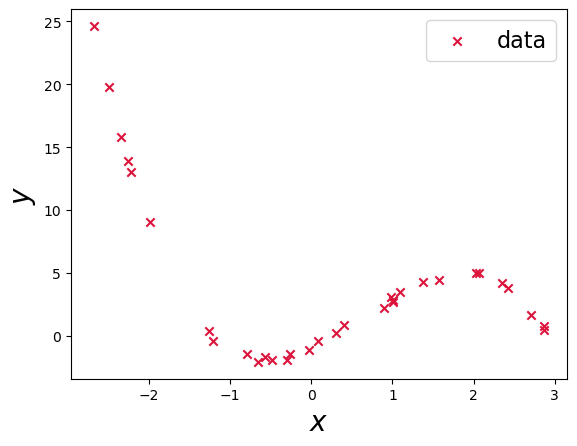

In [6]:
# Plot the data
plt.scatter(x,y,marker='x',color='crimson',label='data')

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)
plt.legend(fontsize=16)

## Step 1:  Code up a linear model for a $3^{rd}$ degree polynomial.

**Recall:** A linear model is a model that can be written in the form

$$h_\theta(\vec{x}) = \theta^T \vec{x},$$

where $\vec{x} = \left[x_0, x_1, \ldots, x_d\right]$.

In this case, we'll take the dimensions of $x$ to be a third order polynomial (d=3):
$\vec{x} = \left[1, x, x^2, x^3\right]$

In [7]:
# Initialize theta to some random values
# theta = (theta0, theta_1, theta_2, theta_3)
theta = np.random.randn(4,)

In [8]:
def get_predicion(x,theta):
    '''
    Evaluate a linear model that is a 3rd order polynomial

    fx = theta[0] + theta[1] * x + theta[2] * x^2 + theta[3] * x^3 

    Input:
    - x: shape n
    - theta: 4

    Output:
    - fx: shape n
    '''
    
    assert theta.shape[0] == 4 # sanity check for 3rd order polynomial
    
    '''
    Your code here!
    '''
    fx = theta[0] + theta[1] * x + theta[2] * x**2 + theta[3] * x**3  # soln

    return fx

## Step 2a) Calculate the loss

In [9]:
def get_loss(y_pred, y_true):
    '''
    Calculate the Mean Squared Error (MSE) loss over N examples

    Inputs:
    - y_pred: (n,) array
    - y_true: (n,) array

    Outputs:
    - loss: scalar
    '''

    assert len(y_pred) == len(y_true) # sanity check the inputs make sense

    '''
    Your code here
    '''
    N = len(y_pred)
    loss = (1/N) * np.sum((y_pred - y_true)**2) # soln

    return loss

In [10]:
y_pred = get_predicion(x, theta) 
loss = get_loss(y_pred,y)

In [11]:
y_pred

array([ -2.89243068,  -1.77436885,  -1.76759022,  -5.753696  ,
       -14.16523698,   2.35729594,  -9.86922505,  -1.75953843,
        -1.71892646,  -3.205334  ,  -1.81735449, -23.641001  ,
       -23.59496928,   9.579882  ,   4.22647868,  -1.75028022,
        -1.75800115,  -2.8998668 , -20.278372  ,  -1.11384742,
        -1.68896825,  -4.52253528,  -1.7543557 ,  -2.81797205,
        -1.00823784, -10.34632203,  -1.71460391,   7.15247412,
       -15.34653782,  -2.56622608,   4.64562468,   5.44380468])

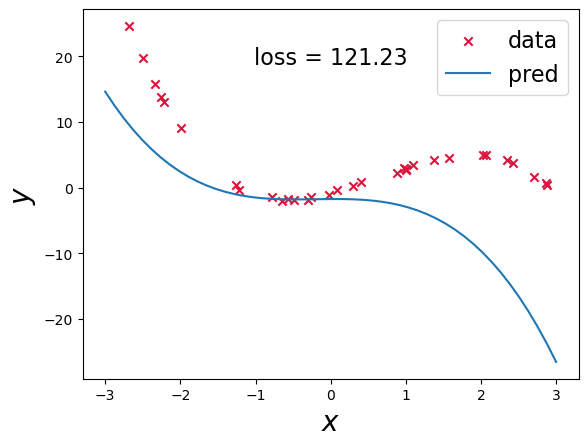

In [12]:
# data
plt.scatter(x,y,marker='x',color='crimson',label='data')

# Show the "initial guess" for the prediction
xx = np.linspace(-3,3)
f_theta = get_predicion(xx,theta)
plt.plot(xx,f_theta, label='pred' )

# These lines are the h_theta(x) for the data samples too
# y_pred = get_predicion(x,theta)
# plt.scatter(x,y_pred,marker='o',color='navy',label=r'$h_\theta(x)$')

ax = plt.gca()
plt.text(.5,.9,f'loss = {loss:2.2f}',fontsize=16,
         ha='center',va='top',transform=ax.transAxes)

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

plt.legend(fontsize=16)

## Step 2b) Gradient of the loss with respect to $\theta$

**Recall:** In the exercise we dervied:

$$ \frac{\partial \mathcal{L}}{\partial \theta} = \frac{2}{n} \sum_{i = 1}^{n} (\theta^Tx^{(i)} - y^{(i)}) x^{(i)}_j$$

In python it's really important for speed to write computations in a vectorized way as much as possible (i.e, without for loops).

We noted in the lecture that we could get the full vector for gradient by noting

$$X =  \begin{pmatrix}
- x^{(1)} - \\ \vdots \\ - x^{(n)} - 
\end{pmatrix} \in \mathbb{R}^{n \times d},$$

where for the $3^{rd}$ order polynomial, $d=3$.

Then $\theta \in \mathbb{R}^d$, $\implies X\theta \in \mathbb{R}^n$ and $y \in \mathbb{R}^n$, so we can write more succinctly as:

$$\nabla_\theta \mathcal{L} = \frac{2}{n} X^T (X \theta - y).$$


In [13]:
def get_grad(x,y,theta):
    '''
    Code up the gradient of the loss with respect to theta.

    Input:
    - x: array (n,)
    - y: array (n,)
    - theta: (d,)

    Output:
    - dtheta: (d,)
    '''

    assert x.shape[0] == y.shape[0]
        
    '''
    Your code here

    Hint: Construct matrix X: (n,d) from examples `x`
    '''

    # Soln
    x0 = np.ones_like(x)
    x1 = x
    x2 = x**2
    x3 = x**3
    
    X = np.column_stack([x0,x1,x2,x3])

    y_pred = X @ theta 
    # y_pred = get_predicion(x,theta) # can also use earlier fct
    
    dtheta = 1/len(y) * 2*(X.T @ (y_pred - y) )
    
    return dtheta


## Step 3: Set up a training loop to infer the parameters

Recall: To update the parameters of the loss by stochastic gradient descent, we simply update the parameters by

$$\theta \leftarrow \theta - \alpha \nabla_\theta\mathcal{L}$$

and then iterate over these update steps.

Since you've coded up all of the above functions, we'll give you the training loop code (see below):



In [15]:
alpha=.005

In [16]:
losses = []

for i in range(501):

    # Calculate y_pred
    y_pred = get_predicion(x,theta)
    
    # Get the loss
    loss = get_loss(y_pred,y)

    # Calculate the gradient
    dtheta = get_grad(x,y,theta)
    
    # Update the parameters
    theta -= alpha * dtheta
    
    # Save the values
    losses.append(loss)

Text(0, 0.5, 'Loss')

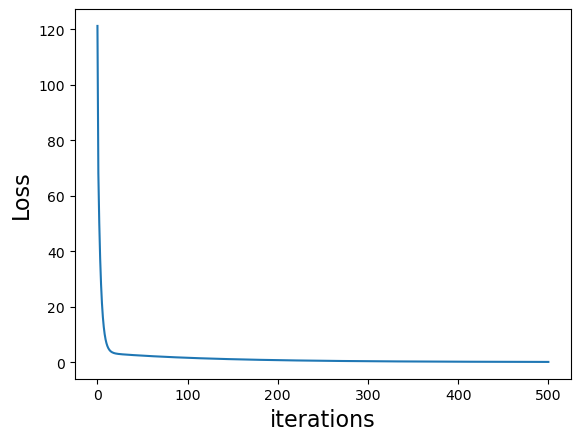

In [17]:
plt.plot(losses)

plt.xlabel('iterations',fontsize=16)
plt.ylabel('Loss',fontsize=16)

In [18]:
losses[-10:]

[0.12824222765127433,
 0.12766358631570252,
 0.12708924678897005,
 0.1265191762045345,
 0.12595334195512117,
 0.12539171169060642,
 0.1248342533159156,
 0.12428093498894176,
 0.12373172511848017,
 0.12318659236217999]

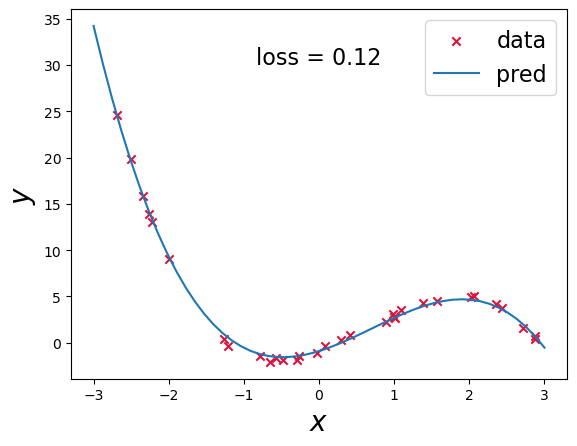

In [19]:
# Overlay the "initial guess" of the data prediction
y_pred = get_predicion(X,theta)

plt.scatter(x,y,marker='x',color='crimson',label='data')

# plt.scatter(x,y_pred,marker='o',color='navy',label=r'$h_\theta(x)$')

ax = plt.gca()
plt.text(.5,.9,f'loss = {loss:2.2f}',fontsize=16,
         ha='center',va='top',transform=ax.transAxes)

plt.xlabel('$x$',fontsize=20)
plt.ylabel('$y$',fontsize=20)

# Get the continuous version of the prediction
f_theta = get_predicion(xx,theta)
plt.plot(xx,f_theta, label='pred' )

plt.legend(fontsize=16)

Are you happy with your model fit?

(Note you might need to play with the learning rate and the number of iterations until you get convergence.)



**Soln:** Note, training with `alpha=0.005` and 501 iterations gave me reasonably good convergence :)

In [20]:
theta

array([-0.90057052,  2.54263299,  1.9724248 , -0.92633401])

## Step 4:; Sharing the discovery

When you found a model you're happy with, got to :

[PollEv.com/nicolehartman968](PollEv.com/nicolehartman968)

and enter the $\theta_0, \theta_1,\theta_2,\theta_3$ values that you get.

(Hint, they should be integers, so round the answers you submit 😄)